In [137]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import string

In [2]:
url = "http://www.popvortex.com/music/charts/top-100-songs.php"

In [3]:
response = requests.get(url)
response.status_code

200

In [4]:
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
soup.select('div.chart-content.col-xs-12.col-sm-8 > p')

[<p class="title-artist"><cite class="title">About Damn Time</cite><em class="artist">Lizzo</em></p>,
 <p class="title-artist"><cite class="title">Hold My Hand</cite><em class="artist">Lady Gaga</em></p>,
 <p class="title-artist"><cite class="title">As It Was</cite><em class="artist">Harry Styles</em></p>,
 <p class="title-artist"><cite class="title">First Class</cite><em class="artist">Jack Harlow</em></p>,
 <p class="title-artist"><cite class="title">Kryptonite</cite><em class="artist">3 Doors Down</em></p>,
 <p class="title-artist"><cite class="title">Rockstar</cite><em class="artist">Nickelback</em></p>,
 <p class="title-artist"><cite class="title">That That (prod. &amp; feat. SUGA of BTS)</cite><em class="artist">PSY</em></p>,
 <p class="title-artist"><cite class="title">AA</cite><em class="artist">Walker Hayes</em></p>,
 <p class="title-artist"><cite class="title">And So It Goes</cite><em class="artist">Billy Joel</em></p>,
 <p class="title-artist"><cite class="title">WAIT FOR U 

In [6]:
soup.select('p cite')[0].get_text()

'About Damn Time'

In [7]:
soup.select('p em')[0].get_text()

'Lizzo'

In [8]:
title = []
artist = []
num_iter = len(soup.select('div.chart-content.col-xs-12.col-sm-8 > p'))

for i in range((num_iter)):
    title.append(soup.select('p cite')[i].get_text())
    artist.append(soup.select('p em')[i].get_text())
print(len(artist))
print(len(title))

100
100


In [9]:
pd.set_option('display.max_rows', 100)

In [10]:
hits = pd.DataFrame({"title":title,
                       "artist": artist,
                      })
hits

title  \
0                                     About Damn Time   
1                                        Hold My Hand   
2                                           As It Was   
3                                         First Class   
4                                          Kryptonite   
5                                            Rockstar   
6               That That (prod. & feat. SUGA of BTS)   
7                                                  AA   
8                                      And So It Goes   
9                     WAIT FOR U (feat. Drake & Tems)   
10                                     'Til You Can't   
11                                That's What Love Is   
12                            Cold Heart (PNAU Remix)   
13                                         Big Energy   
14                                   Here Without You   
15                        Have You Ever Seen the Rain   
16                                  Island In the Sun   
17                                         Fancy Like   
18                         Bam Bam (feat. Ed Sheeran)   
19                    In Jesus Name (God Of Possible)   
20                                      Wasted On You   
21                               All the Small Things   
22                                         What's Up?   
23                                            Shivers   
24                                           Far Away   
25                                 Livin' On a Prayer   
26                                  Don't Think Jesus   
27                                  If I Was a Cowboy   
28                                        Unstoppable   
29                                         Photograph   
30                                        Tubthumping   
31                                    Numb Little Bug   
32          Grandpa (Tell Me 'Bout the Good Old Days)   
33                                             Zombie   
34                         Honest (feat. Don Toliver)   
35  Enemy (From the series "Arcane League of Legen...   
36                         Honest (feat. Don Toliver)   
37                                          Mr. Jones   
38                              Every Breath You Take   
39                                    About Damn Time   
40                                           PROVENZA   
41                          We Don't Talk About Bruno   
42                                  Wonderful Tonight   
43                                         Heat Waves   
44                                    Never Say Never   
45               Big Energy (Remix) [feat. DJ Khaled]   
46                                       Take My Name   
47                                             Dreams   
48                                              Ghost   
49                                      One Headlight   
50                               Like a Prayer (Live)   
51                                 A Man Without Love   
52                                     Thousand Miles   
53                  Drunk (And I Don't Wanna Go Home)   
54                                        Damn Strait   
55              Love Can Build A Bridge (Single Edit)   
56                                   Sand In My Boots   
57                                        Tomorrow Me   
58                                            Flowers   
59                        Buy Dirt (feat. Luke Bryan)   
60                                       Hold My Hand   
61                 Flower Shops (feat. Morgan Wallen)   
62                                       Jack & Diane   
63                                   When You're Gone   
64                    WAIT FOR U (feat. Drake & Tems)   
65                                         Why Not Me   
66                                          The Motto   
67                                              Mamas   
68                                      Fortunate Son   
69                                       Freaky Deaky   
7

In [11]:
hits['title']= list(map(lambda x: x.split('(')[0], hits['title']))
hits['title'] = list(map(lambda x: x.lower(), hits['title']))
hits['artist'] = list(map(lambda x: x.lower(), hits['artist']))
hits.head(100)

title  \
0                about damn time   
1                   hold my hand   
2                      as it was   
3                    first class   
4                     kryptonite   
5                       rockstar   
6                     that that    
7                             aa   
8                 and so it goes   
9                    wait for u    
10                'til you can't   
11           that's what love is   
12                   cold heart    
13                    big energy   
14              here without you   
15   have you ever seen the rain   
16             island in the sun   
17                    fancy like   
18                      bam bam    
19                in jesus name    
20                 wasted on you   
21          all the small things   
22                    what's up?   
23                       shivers   
24                      far away   
25            livin' on a prayer   
26             don't think jesus   
27             if i was a cowboy   
28                   unstoppable   
29                    photograph   
30                   tubthumping   
31               numb little bug   
32                      grandpa    
33                        zombie   
34                       honest    
35                        enemy    
36                       honest    
37                     mr. jones   
38         every breath you take   
39               about damn time   
40                      provenza   
41     we don't talk about bruno   
42             wonderful tonight   
43                    heat waves   
44               never say never   
45                   big energy    
46                  take my name   
47                        dreams   
48                         ghost   
49                 one headlight   
50                like a prayer    
51            a man without love   
52                thousand miles   
53                        drunk    
54                   damn strait   
55      love can build a bridge    
56              sand in my boots   
57                   tomorrow me   
58                       flowers   
59                     buy dirt    
60                  hold my hand   
61                 flower shops    
62                  jack & diane   
63              when you're gone   
64                   wait for u    
65                    why not me   
66                     the motto   
67                         mamas   
68                 fortunate son   
69                  freaky deaky   
70            the boys of summer   
71           when you were young   
72                  fall in love   
73                 summer of '69   
74         give heaven some hell   
75             tennessee whiskey   
76                   wait for u    
77                    easy on me   
78                        2step    
79                     boyfriend   
80                     actin' up   
81      love can build a bridge    
82       love can build a bridge   
83             edge of seventeen   
84     you should probably leave   
85               bad moon rising   
86                    doin' this   
87          something in the way   
88               mama he's crazy   
89  she had me at heads carolina   
90                          soul   
91              into the groove    
92                    big energy   
93                    bad habits   
94                        jireh    
95               go your own way   
96                mr. brightside   
97                    the reason   
98                      fly away   
99                   tom's diner   

                                               artist  
0                                               lizzo  
1                                           lady gaga  
2                                        harry styles  
3                                         jack harlow  
4                                        3 doors down  
5                                          nickelback 

In [12]:
import random 
print('Choose "song" or "artist":')

songart = input()
songart = songart.lower()

if songart == 'song':
    print('Enter a song: ')
    song = input()
    song = song.lower()
    
    if song in str(hits['title']):
        hits2 = hits[hits['title']!= song]
        random_index = random.randint(0, len(hits2.title)-1)
        print('Your song recomentation is:', hits2['title'][random_index].title(), 'by', hits2['artist'][random_index].title())
    else:
        print('Sorry we have no recomendations for you yet')

elif songart == 'artist':
    print('Enter an artist: ')
    artist = input()
    artist = artist.lower()

    if artist in str(hits['artist']):
        random_index = random.randint(0, len(hits.title)-1)
        print('Your song recomentation is:', hits['title'][random_index].title(), 'by', hits['artist'][random_index].title())
    else:
        print('Sorry we have no recomendations for you yet')

else:
    print('We could not recognize that. Please enter "song" or "artist".')


Choose "song" or "artist":
artist
Enter an artist: 
lizzo
Your song recomentation is: Zombie by The Cranberries


In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans

In [14]:
final_df = pd.read_csv('final_df.csv')

In [15]:
final_df.reset_index(drop = True, inplace = True)
final_df.drop('Unnamed: 0', axis = 1, inplace = True)
final_df

song                 artist  \
0                 Vienna             Billy Joel   
1       Virtual Insanity             Jamiroquai   
2              Piano Man             Billy Joel   
3            Cosmic Girl             Jamiroquai   
4           A Heady Tale          The Fratellis   
...                  ...                    ...   
140731    Come Back Home            Calum Scott   
140732    Enough for You           Saint Claire   
140733             Do It              Mike Stud   
140734          No Smoke               D Savage   
140735           En Vida  Banda Los Sebastianes   

                                         uri  acousticness  danceability  \
0       spotify:track:4U45aEWtQhrm8A5mxPaFZ7       0.65900         0.532   
1       spotify:track:19ZWoeA7ZvCHc0jeDPrq5S       0.18900         0.616   
2       spotify:track:1TpxoHaDRVAUQbJsKKZGAv       0.60600         0.330   
3       spotify:track:2fiRJjWb9uk21Gva6oHpKs       0.03480         0.643   
4       spotify:track:6IvPf76ALwZTcmxOVFPB0v       0.00431         0.563   
...                                      ...           ...           ...   
140731                0cvfSKcm9VeduwyYPrxtLx       0.00678         0.601   
140732                43MP9F7UzvfilSrw2SqZGJ       0.91800         0.387   
140733                4TWlUuFk81NGUNKwndyS5Q       0.33000         0.717   
140734                5iGBXzOoRo4sBTy8wdzMyK       0.00790         0.772   
140735                7LNtyuekYHiZ99UxkrfCQR       0.54900         0.715   

        duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0            214240   0.495          0.000000   10    0.0754    -6.662     1   
1            340333   0.822          0.000096    6    0.3470   -10.228     1   
2            339027   0.551          0.000003    0    0.1870    -6.506     1   
3            242973   0.934          0.000654   11    0.3030    -6.651     0   
4            292653   0.795          0.000000    0    0.1310    -5.356     1   
...             ...     ...               ...  ...       ...       ...   ...   
140731       190539   0.801          0.000000   11    0.0991    -5.174     1   
140732       194583   0.249          0.000000    9    0.1030   -13.233     1   
140733       139191   0.532          0.000000    8    0.0997    -8.351     0   
140734       180013   0.510          0.000000    4    0.1310    -9.670     0   
140735       145827   0.734          0.000000    3    0.1080    -3.244     1   

        speechiness    tempo  time_signature  valence  
0            0.0343  124.936               4   0.3080  
1            0.0834   91.914               4   0.5400  
2            0.0275  177.654               3   0.4140  
3            0.0513  119.838               4   0.9290  
4            0.0419  116.681               4   0.7630  
...             ...      ...             ...      ...  
140731       0.0323  131.049               4   0.2890  
140732       0.0437   94.039               4   0.3460  
140733       0.2060  156.977               4   0.5460  
140734       0.1200  120.049               4   0.0755  
140735       0.0367  130.128               3   0.9760  

[140736 rows x 16 columns]

In [16]:
df_num = final_df.select_dtypes(include = np.number)

In [17]:
df_num_prep = StandardScaler().fit_transform(df_num)

In [18]:
df_num_prep = pd.DataFrame(df_num_prep,columns=df_num.columns)
df_num_prep

acousticness  danceability  duration_ms    energy  instrumentalness  \
0           0.931366     -0.258033     0.001312 -0.301279         -0.609586   
1          -0.435761      0.188628     1.042901  0.961978         -0.609315   
2           0.777200     -1.332147     1.032113 -0.084942         -0.609577   
3          -0.884295      0.332197     0.238660  1.394654         -0.607745   
4          -0.972983     -0.093194     0.649041  0.857673         -0.609586   
...              ...           ...          ...       ...               ...   
140731     -0.965799      0.108867    -0.194470  0.880852         -0.609586   
140732      1.684740     -1.029055    -0.161065 -1.251620         -0.609586   
140733     -0.025623      0.725684    -0.618629 -0.158342         -0.609586   
140734     -0.962541      1.018141    -0.281420 -0.243332         -0.609586   
140735      0.611400      0.715050    -0.563813  0.622019         -0.609586   

             key  liveness  loudness      mode  speechiness     tempo  \
0       1.323962 -0.712583  0.495630  0.798957    -0.613066  0.179309   
1       0.213389  0.909085 -0.059560  0.798957    -0.211175 -0.919386   
2      -1.452469 -0.046242  0.519917  0.798957    -0.668725  1.933322   
3       1.601605  0.646370  0.497342 -1.251632    -0.473919  0.009690   
4      -1.452469 -0.380607  0.698960  0.798957    -0.550859 -0.095348   
...          ...       ...       ...       ...          ...       ...   
140731  1.601605 -0.571075  0.727296  0.798957    -0.629437  0.382698   
140732  1.046319 -0.547789 -0.527408  0.798957    -0.536126 -0.848684   
140733  0.768675 -0.567493  0.232670 -1.251632     0.792324  1.245365   
140734 -0.341897 -0.380607  0.027315 -1.251632     0.088401  0.016711   
140735 -0.619540 -0.517935  1.027777  0.798957    -0.593422  0.352055   

        time_signature   valence  
0             0.233315 -0.524142  
1             0.233315  0.372026  
2            -1.741178 -0.114686  
3             0.233315  1.874652  
4             0.233315  1.233429  
...                ...       ...  
140731        0.233315 -0.597535  
140732        0.233315 -0.377356  
140733        0.233315  0.395203  
140734        0.233315 -1.422241  
140735       -1.741178  2.056204  

[140736 rows x 13 columns]

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

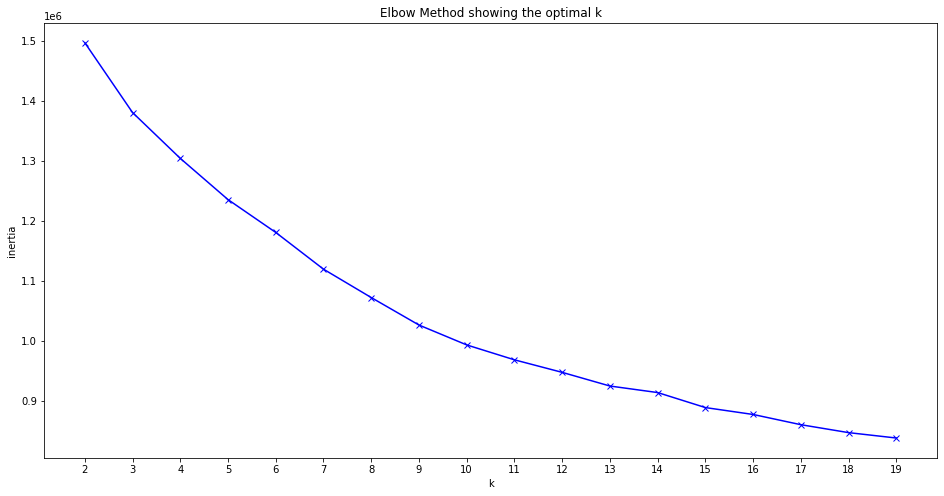

In [30]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_num_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Text(0.5, 1.0, 'Slhouette score showing the optimal k')

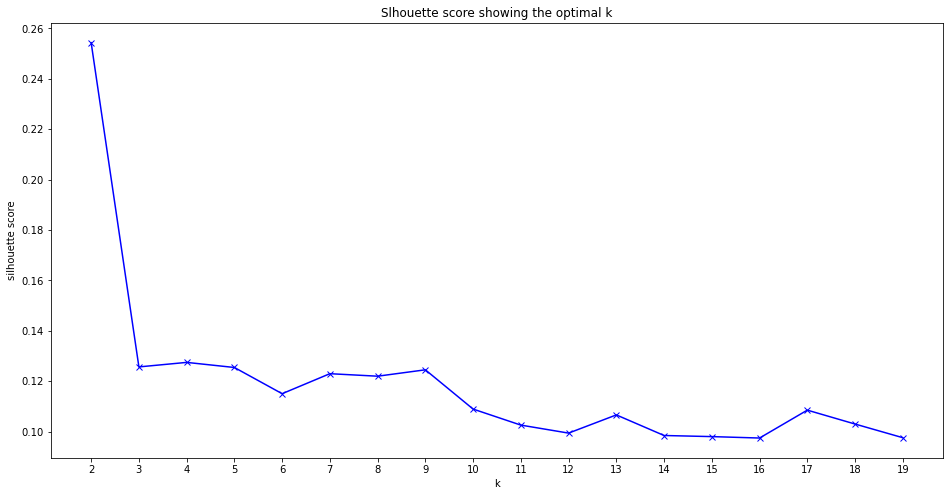

In [34]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_num_prep)
    silhouette.append(silhouette_score(df_num_prep, kmeans.predict(df_num_prep)))
    print(k)
    
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [157]:
from sklearn import cluster

In [240]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(df_num_prep)

KMeans(n_clusters=4, random_state=1234)

In [241]:
clusters = kmeans.predict(df_num_prep)

In [242]:
clusters_num = pd.Series(clusters)
clusters_num

0         1
1         1
2         1
3         3
4         1
         ..
140731    1
140732    2
140733    3
140734    3
140735    1
Length: 140736, dtype: int32

In [243]:
clusters_df = pd.DataFrame(clusters_num)
clusters_df.columns = ['cluster']
clusters_df

cluster
0             1
1             1
2             1
3             3
4             1
...         ...
140731        1
140732        2
140733        3
140734        3
140735        1

[140736 rows x 1 columns]

In [244]:
clusters_df = pd.concat([final_df, clusters_df], axis = 1)

In [245]:
sac = clusters_df[['song', 'artist', 'cluster']]
sac.columns = ['title', 'artist', 'cluster']

In [246]:
import re

In [248]:
for i in sac['title']:
    if str(type(i)) == "<class 'str'>":
        print(i)

Vienna
Virtual Insanity
Piano Man
Cosmic Girl
A Heady Tale
Acid Jazz Singer
Whistle For The Choir
Lincoln Highway Dub
Red Red Wine
Santeria
Foolish Fool - Rarities Version
Doin' Time
Crocodile Rock
Your Song
No Rain - Remastered 2002
Mr. Jones
Mr. Brightside
Your Touch
KRS-One
Come Fly With Me [The Frank Sinatra Collection] [1966 Live At The Sands Album Version]
Summer Wind
El Scorcho
Billie Jean
Dancing In The Moonlight (It's Caught Me In It's Spotlight)
Dancing In the Moonlight
Burnin' for You
(Don't Fear) The Reaper
Sunday Morning
This Love
Don't Stop Me Now - Remastered 2011
Under the Sea - From "The Little Mermaid" / Soundtrack Version
People Get Ready - Single Version
Everybody Plays the Fool
It's Your Thing
Superstition - Single Version
Lights - Bassnectar Remix
Chelsea Rodgers
I've Got the World On a String
You Sexy Thing
Evil Ways
Let It Whip - Single Version
Sweet Dreams (Are Made of This) - Remastered
Sir Duke
The Bare Necessities - From "The Jungle Book"/Soundtrack Version


Lofticries
London Song
Lonely Life
Lonely Lonely
Lonely Loves
Lonely Shredder
Loner Phase
Lonesome Hunter
Lonesome Town
The Long And Winding Road - Anthology 3 Version
The Long And Winding Road - Remastered 2009
The Long And Winding Road - Remastered 2015
Long Distance
Long Distance Call
Long Night
Long Tall Sally - Anthology 1 Version
Long Tall Sally - Live / Remastered
Long Tall Sally - Remastered 2009
Long Way From Home
Long, Long, Long - Remastered 2009
Longshot (7 Nights)
The Look
Look at Me
Look For The Silver Lining
The Loop
The Loop (Green Version)
Lose Yourself
Lose Yourself - From "8 Mile" Soundtrack
Losing My Religion
Lost - Live At MTV Unplugged, 2009
Lost for Words
Lost In The Light
Lost Kitten
Lost That Easy
Lotus Island
Loud Places
Louis-Félix-Antoine
Lounge Act
Louxor j'adore
Love
Love
Love & Hate
Love & Hate - Live From Spotify London
The Love Club
Love For Sale - NerdStar Ain't That Right Remix
Love for Sale - (Live) Butter Remix
Love for Sale - Live Remastered
Love I

Hey My Man
Save Me
The Graveyard Near The House
Hummed Low
Swallow (Filthy Victorian Mix By Perfidious Words)
These Things
Open Your Eyes
Pressure
Change
Can't Believe
Suffer
Warm Safe Place
Waste
Take It
The Journey
The Little Things Give You Away
Eavesdrop
My Father's Father
Breathe Me
Let Me Be Myself
Here's to Never Growing Up
Take Me To Church
Ring of Fire
I Walk the Line
Hurt
Fly Me To The Moon
Mack the Knife
Home
What About Now
No Surprise
September
One Thing
Everything
Dungeon Sound
Chop Suey!
Opinions Wont' Keep You Warm At Night
What Are You So Scared Of?
Time is Running Out
Killing Me
Not Meant to Be
Let Me Go
Sound of Madness
Call Me
The Crow & the Butterfly
If You Only Knew
Breaking Inside
Empire State Of Mind
Stand by Me
When I Come Around
Name
Mindfields
Prime Audio Soup
Clubbed to Death - Kurayamino Variation
Dragula
Change (In the House of Flies)
My Own Summer (Shove It)
Swerve City
Pardon Me
Privilege
Nowhere Fast
Consequence
When It Comes
Stellar
Clean
Stricken
Stupi

Lost You (feat. Twin Shadow & D'Angelo Lacy)
You Send Me
What You Know
Wish You Were Here
Hear You Me
Sex You
You Don’t Get Me High Anymore
drugs
I Miss You
You Spin Me Round (Like a Record)
Can You Feel My Heart
Baby Are You Home
Walk With You
Fight For You
Say You Do (feat. Imani Williams & DJ Fresh)
Once You Go Up - Original Mix
If I Should Go Before You
Gyal You A Party Animal - DJ BrainDeaD Remix
Someone Like You
You Name It! (#UNameItChallenge)
Without You
A Girl Like You
I Believe in You
Playing for You
Hurricane
I Know What You Want (feat. Flipmode Squad)
This I Promise You
Me Like Yuh
Wait for You
Thinking Of You
You
What You Want
Baby You (feat. Jason Derulo)
Show You
Crave You
Be As You Are - JordanXL Remix
About You
IF YOU
I Want You
UGH!
Guns And Roses
Want You Bad
Drag You Down
I Hope You Dance
What You Want
Rock You Like a Hurricane
You Broke Up with Me
Lost In You
Show You the Way
Run To You
Where Did You Sleep Last Night
You Make Me
Why Do You Run (ASOT 801) [Future Fa

NYC Observation
Babe
Liabilities
Somebody Else
Two-Twenty7
Extinction
Prélude de la porte héroïque du ciel
Bella ciao - HUGEL Remix
A Bizarre Cypher
I Know That You Still Love Me
Pray for Me
Bum Bum Tam Tam - Tiësto & SWACQ Remix
Glaza
Back To The Beginning
Mesquit - Original mix
Shook
Coffee
Separate Ways
Shifter
Major Love (Remix)
El Del Cuchillo
Shown and Told
Better
Fibers
Drifting Away
Keep Falling in Love
Criminal (Bachata Version)
Four Winds
Where They at (feat. Yazz)
Long Way Down
Latchkey Kids
#FREESHAKA INTRO
Death Will Bring Change
Walls
Ryu
Sweet & Bitter
Sharecroppers
Venom
Winter in TLV
Believer
Municipals
Moneychangers
Ruleta - Original mix
Teapot - Original mix
Never Been This Hard (feat. Jussie Smollett, Rumer Willis & Kade Wise)
Folk Er Fake
Irresistible
Nugget - Original mix
Issa Photoshoot - From “Star" Season 2
Energy
Kruza
LA DI DA
Everything Begins Behind The Clouds
Muscovites
Good Foot (feat. Jussie Smollett, Rumer Willis & Kade Wise)
Answerphone (feat. Yxng Ban

Heartworms - Flipped
A Reminder
En Tijuana Naci "El Nini"
B.Y.D.
Just Wanna Dance
Warrior (feat. John Cooper)
Head Right
Dark Down Below
Over You
Kelly's Bar
Strength
Piano Trio No. 2 in E-Flat Major, Op. 100, D. 929: II. Andante con moto
Crazy
07 Lynch (feat. Daboii)
Cafeteria
Clarify
Caution
Follow Me
Pégate a la Pared
Moment
You Shine
Cumbersome
Inhale - TCTS Remix
Orbital
Zombie
Don't Enter Fear
I Can't Trust Myself
Imagínate - Remix
The Bitch Is Back
Party Freaks
Clockwise
I Can't Stand It
Fire In Me - Sigala Remix
Chasing Light
Chances
Waves
Take You Down
All Hail the King
Best Me
Fight or Flight Club
Nothing but the Best (feat. Ari Lennox)
Goodbye Bad Times
Seventeen
Won't Say I'm in Love (Mashup) [feat. Terrence Williams, Jamahl Rawls & Foti]
Coming Back to You
3m
Two Days in Savannah
You Can Stay
Change
iKnow
DEJAVU
Manic
Despedida De Soltera
Too Many
Between the Breaths
Hallelujah Nights
Happiness
Babylon
Waiting (feat. Otis Parker)
Yuika
On These Niggas
We Set Fire
Attac
Pas

A Beautiful Place Is Coming
Calm Down
Cash In
Damn
Evil
Jack
Protect You
Sailor
Where Is Bill
World
Made Man
Dynasty - Kölsch Remix
Contrails
Smile (Life Room) (feat. Grashovia “Grandy” Wilson)
Close
Gustavo
Photoshoot
Pelicula
Prey
Get Hype
Thought She'd Be Mine
H.A. Wallace Space Academy
What Does He Want Of Me
Million Miles Away (ASOT 858)
Natalie
Recipe For Disaster
Scars
Bossin'
Dubai Drip
Upset
Give It Up
Corazón Ranchero
Talking Straight
Mystery
Boom Da Bass
daphne did it
Mr. DopeMan
Money Fi Run
Enjoy What You Do
Bees
Drown In My Mind
Nothin' Like Us
This Wild Darkness
I Can
Again
Poikaystävä
No Eres Tú
Break a Bottle
So Will I (100 Billion X) - Live At Hillsong Conference
Let Me Know
I've Got a Feeling
Dead Things to Life
Live Til 60
You'll Never Walk Alone (feat. Madelaine Petsch) [From "Riverdale"]
What a Time to Be Alive
All Hell Broke Loose
Muse
Everything
What Lovers Do (feat. Mariana Nolasco)
Finally
Te Necesito
Time + Space
Street Hop
Take Me Higher
No Les Creo
Q&a
Bles

Never Enough (Piano Arrangement)
Zoom Pius
Half of You - Audiotree Live Version
Boy Crazy - Audiotree Live Version
Fire Drills - Audiotree Live Version
5 out of 6 - Audiotree Live Version
Over It
The Betrayal
Crazy Girl
Harder, Harder, Harder
The Rapture
Better Luck Next Time
사람 구경 중 Sightseeing
Not Like You Care Anyway
Gracias A Dios
Slayers
Blood Honey
Atrophy
Lay It Back
Back and Say
Avengers: Infinity War
Huge Deposit (Interlude)
Blank Canvas
Kelsey
I Know - Live
Glaring
Running Away
'93
Dead Man
Dead Man
Lie
Who You Are
High Strangeness
Nation of Praesepe
Zero Hour
Other Side
She's Got Love
後來的我們 - (電影《後來的我們》片名曲)眼淚未乾版
Special Moment
Rollout
Humanidad
For Miles & Miles
Who's To Blame
Rewrite the Stars (The Greatest Showman)
Hello
BOW DOWN (feat. CRAZYBOY)
Estamos A Mano
Doing The Right Thing
Vie d'amour
Is Now a Good Time to Ruin Your Life?
Big Life
True Story
School Nights
You Can Call Me Al
Glaciers
Círculo - Ao Vivo
Only Human
Trappin' Ballz
Octagon Octagon
Examation
Leave Me Al

Tell Her You Belong To Me (Live)
Take It to the Cross
Lost
The Valley
Space Gun
Tori
Believe
Things Will Get Better
Melange
Explaining Jesus
Miles to Go - Radio Edit
Sucker For Love
Special
Vibe
Revenge
Feeling Low (Live)
[Covered in White]
Jump Till Morning
Look for Me
Fuegolando
Ten Below
Novacane
Ohboot
Solomolo
You Know
Flying Down
I Feel Love
Read My Mind
Change
Location
Break the Glass
Pineapple
Find You - Club Mix
At the Center Is Love
The Feeling of Being Alive
Relaxing Rainfall
I Don't Mind
Forever - Eurovision Version
Everything I Got
Bonita, Lindinha e Sagaz
Quiero Ser de Ti
Hollywood Angel
Livid
Baby Please
Juice (feat. Gucci Mane)
Been Here Before
Madness
The Light
Boys Like You
Feel the Same
All I Know Iz (feat. Finding Novyon)
birds in my head
Metronome
Hug of Death
Rain - Live & Acoustic
Vision
4U (feat. Fat Trel)
Te Borre
Southside
The Lost Boys
Now He's Our Father (Reinterpretation)
We Choose
Therapy (Mix Cut) - Club Mix
Man Card
Stretch Out and You Can
Voces 2
A Mill

Radio Dials
Smile
Navigator
Never Hate Me
Jump
Friends
Affirmations
Late Night
Water
Late Bloomer
Sometimes
Don't Brag
Dissect Me
That Feeling (feat. Anthony Green)
The Light
Do You Feel Like You Have No One to Turn to?
Troll
Erased
Up Again
My My My!
No Point
During Waiting for Dreams
Flash Floods
Ruby Soho
Sonar
Take Me Back
Always You and Me (Instrumental)
Centro (feat. Coez)
Just Asking
You Give Me Life
Rain Sounds for Studying and Brain Power
Brain Power Studying Music and Rain
Lipstick Looks so Good on You
Let's Make Love
Red Wine
I Love U
Never Enough (The Greatest Showman)
Save Myself - Club Mix
Hot Damn
Ungrateful
Insecurities
The Great Beyond
Avanzando
Riding in Your Car
No More Cake
Le Hase Falta Un Beso (En Vivo)
Roses
Paradox Passage 3
Fanny (En Vivo)
Hagámoslo
Dear Life - Farmhouse Sessions
DR. PHIL
Imitador
U.
Last Chance
Fighting For
My Queen Is Harriet Tubman
The Worst Day Ever
Valar Morghulis
Naked
Just Shy
This Is the Moment
Keefak Bel Hob - The AB Brothers Remix
Loo

The Spier House
Entertaiment
La grande rêveuse
Up Wit Us
Long Distance
Xion
B.I.D
Hunting
burn to dust
You'll See
90-25
Version 3 - Tenova Remix
Party & Bullshit (feat. J.Craft)
In motion
Únicos (En Vivo)
Honey Dew (ChopNotSlop Remix)
Trust Love
Italian Winter
25-0
Black Jesus
Sold To Perfection
Tunnel Rat
Casa Mia (feat. Luchè & Capo Plaza)
It Hears You
Degodegode
Para Siempre
Ya no tengo corazón (feat. Lead)
Nothing Ever Changed
Little Grammz
Next To Me
New Chapter (Original Mix) - TR420
Soul Food
Emmanuel
Disposable
Bloody Nose
Cheetah
Ricki Lake
Newport Shawty
Ksubis
Buckle Down
Back Trappin'
I've Been Down
Setting Forth
Smooth Soul
Headrush
Have Fun Tonight
Beating Brown Noise
You Only Say You Love Me in the Dark
Home to Me
Let's Make Out
Clouds
Call the Cops
Don't Go
Mad at the World
Overwhelmed
Juguetona
The Best of It (feat. La Roux)
On the Run
Everyday
Same Shit
Ouu
California
Outside (feat. Mabel)
Overtime
Without Question
FOREIGN
Contigo
Purify - Interlude
Ahora No
New Thing

Ventus
La Maro
The Only Thing New Is U Finding Out About It
Malnati
El Santero
Balenciaga
Money in the Bank
Go Legend (& Metro Boomin)
Preludes & Fugues, K. 404a: Fugue No. 2 in G Minor
Intergalactic Plastic (ABGT274)
Complicated
Formula 1 Theme
Champagne Scriptures
Precarious
Wraith
Sundown Nomad
Plug
Lit (Instrumental)
Neurons
Oceans (Where Feet May Fail) [Strings Version]
Uno squillo
I'll Watch You Die
After Midnight
Cheshire
Whispers (ABGT276)
Ride Wit It (feat. RG)
please, say something
Ghost
Fossil Record
Stay High 2.0
Hunger Pains
A State Of Trance (ASOT 858) - Ruben Almost Got Arrested
Smiling People (ASOT 858)
The Box (ASOT 858)
Don't LV U Anymore
ReUP
Gravity (ABGT277)
Real Hitta
Doubted Us
Space Jam
Optimistic
For the Love
Long Live Savy G
Fresh
This Little Girl (feat. Thatcher)
Rest Of My Life - Reimagined By HaronTe
Take It Slow
Summer Madness
I Like
The Hollow Hour
Things Could Be Better
Revenge Is Sweet
Red
I Got Saved - Live
Lantern
Never Stop
Suddenly Gone
After the To

Revisen Mi Historia
Mejilla Izquierda - En Vivo
Olvidar/El Oasis/Saber Perder - En Vivo
La Montaña - En Vivo
Razón - En Vivo
Party Time (feat. Jadakiss)
My Blossom
Couch Song
SHINY COMBEE feat. EJAAZ & Lil Boii Kantu
Mii Channel (From "Nintendo Wii Mii Channel")
I Keep on Walking
Hierba Mala
Million Reasons
Rain - Edit
I Loveando Tu - Ao Vivo
Callin My Phone
Daughter
Sweet Potatoes Freestyle
Ajshe
Amigos (ABGT275)
Bad Mind
Études, Op. 25: II. Etude in F Minor
Got This Boy in Love
So Easy
Nostalgias Santiagueñas - Banda Sonora Original de la Película "Ábalos, una Historia de 5 Hermanos"
Rebel
Twice Solo
Our God Is Alive
The Dinner Table
High Siren
Other Side
6 Days
Sade
Doughnuts Forever
Oder nicht
XO TOUR LLif3
Divergent (ABGT277)
The Myth of Hapiness
Pastel Con Nutella
Do It Again
RaRa
Did It Come True?
For Sale
Non-Locality Destination
Proton Bonfire
Амплуа
Permatrip
Blow My Saxophone (Radio Edit)
Nothing Like You
This Is Me / Scars to Your Beautiful
Oh Man
Glue
Beachtowel
Your Love


Lonesome Prayer
CrucifiXXX
Duct Tape (feat. Benny Reid)
Driving Through Compton (feat. Aneesa Badshaw)
October 2nd (feat. Iliana Eve & King Graint)
What Jazz Is to Me (feat. the Visionary and the Architect)
Crossroads
Intervention
Chitthi Bhitra
Bardock Theme
Iam Just a Hologram
Me Voy Mañana
꺼내보면
Baby Mama
Need You - Asher Postman Remix
Love Triangle
Your Body
Cosmic Sign
All My Life (feat. Mozzy & Skooly)
Pa' Que Se la Eche
Over
Gucci Gang
Move With It
Party Up
For a Checkmark
Action Scene
Words
Never Had Sh*t
House Before the Party
Big Dola
Gjuha e kampionit
Ask
Papa Noël
Study Music Thunderstorm
You Don't Own Me
Lick My Choppa
La Carnita Asada
Anchor
La Arepa
Cumbia Campanera
Delight
Эгоист
El Samuray
Just Imagine
Such a Waste
Flossin'
Que Te Paso
San Francisco
Eka Mai Recitation
Sugar Coat It
Turn up Now
2 Fast
By Your Side
garden in a bottle
Eclipse
Radio Plays
Back At Em
Lament for Boromir
Blazin'
We Open Our Hearts (Live)
Crushed
I'm Afraid Anymore
Saz Me
Moltrasio - SOL Versio

5 Little Ducks
Star
The River
Makin' Whoopie
Never Be Forgotten
like me
Crazy
Wasting Time
White Ferrari
Chasing The Star
Don't (Album Mix)
The Run
What Happened 2 da World
Christ Be With Me
Ride
Glorious Day
The Shore
Direct Deposit
Yo Man (feat. Yhung T.O. & Lul G)
Love Lies
Novo (feat. Simone & Simaria)
Stop Signs
Hungry Hippos
To Live & Die in L.A.
Citizen - Live in Melbourne, Australia
No Sabes
Sunny Day
There She Go
Te Robe la Juventud
Quiero Cantarte a Ti
Gratitude
Empty Houses
Asmr Ocean Waves for Sleep
Abandon Ship
El Shaka (Tema De La Serie de TV "El Shaka")
The Animals - Vince Clarke Remix
Focus
Road To Riches
Rain Barrel
Nobody
Colours
Long Good Night
The Land
Frozen
I Can Tell
I Feel So Alone
Nueva Era
Bless the Lord
His Ways
Like I Do Without You (Infinite Soju)
Spotify Money
Prom Night
Subtle White Noises
Methodical Dissonance
Scaling Madness
Limelight
Stay
Melatonin (The Melted Moon)
Is It Wrong That I Wanna Fall Asleep Forever
Vibrations
Back From The Dead
Weed 'n Henn

GUSH
Christ Be All Around Me
Still Trapping While Rapping
Thy Menacing Gaze
Bebi Bebi
Gasoline
Nadie Sabe
Step On It To Hard
Shape Of Miracle
I've Been There Buddy
Wax Wane Tears
Crystallized (Bonus Instrumental)
Ethereal
Moderation
My G
Nosebleed Exotica
Big Bars
Force Lanmou
Le Notre
Orgeuil
너와 나의 것 Ours
Was It You Who I Saw?
Into Our Love
No Hook
Revolution - Remix
Waybach
Hasta el Amanecer - En Vivo
Melancholia
Zlifs
Wooly Bully
12 Études, Op. 10: No. 3 in E Major "Tristesse"
Perfect
Brainwave Entrainment and Thunderstorm Sounds
Te Diran (feat. Conjunto Brio Norteño)
El Gordo Armany
El Rojo de Texas
East St. Louis Toodle-Oo
Prelude to a Kiss
The Vulture
Stray
Demons
R.O.D
Better Days
Sleeping Giant
Trois chansons de Charles d'Orléans, L. 92: I. Dieu ! qu'il l'a fait bon regarder !
Follow - Original Mix
Game of Thrones - Hurdy Gurdy Version
Sad and Boujee
The Beginning
So Many Feelings
Low Key Trill
Memba ME
I Can Make Ya
Change Up
Never Fly Again
Faj
North Nights
1000 Times
Thumper

Vibin' With You
Kids In Love
UBER
Jameel's Space Ride (Chopnotslop Remix)
Feel It
Skinite nam fore
Call Me (On the Phone)
Urbane Sunset
Hide and Seek
Victory
Crazy - HIDDN Remix
Got the Hood Broke
Behold the Bearer of Light
Медленно
In the City
Smile for Me
What Are You Waiting For
Drive
Hometown
Audition 18
Attention
What Are You Going to Do After the Orgy?
Loose Leaves
Been On A Grind Since A Kid
A Little Me
Bulliest
Begins with You
Fruit d'mon époque
Neon//Love
Inferno
Regresate
Fireproof (feat. Matty McDonald)
Note A
Don't Play with Matches
Canker Sore
No Hands (feat. Gucci Mane & Lil Boosie)
Look Out for MySelf
IDK About You (feat. rip ME) - rip ME reWORK
The Heist
Rid You of Your Flesh
Que Hay Que Hacer (El Jr Avendaño)
Ve'eem Tavo'ee Elay (And If You Will Come to Me)
Isang Linggong Pag-Ibig - From "Sin Island"
12 Études, Op. 10: No. 5 in G-Flat Major "Black Keys"
12 Études, Op. 10: No. 6 in E-Flat Minor "Lament"
Say It
The Yodeling Veterinarian Of The Alps
To da Bank
Speedin' RE

I Been Waitin (feat. Joseph Kay & P-Hustle)
Fuck! (A Hook)
Lift Off
cplx nucleid
Drifting Together
All the Way to That Bank
Bad Blood
Gaunter O' Dimm / Hearts of Stone Theme
Beautiful
Goodnight Forever
Show And Tell
Portugal
End Of Time - PAL Remix
Big
Mercy Mercy
Piano Concerto No. 21 in C Major, K. 467 "Elvira Madigan": II. Andante
A State Of Trance (ASOT 855) - ASOT Event Ultra Miami 2018 Announcement, Pt. 1
Bos Bos
Web of Treachery
Iwanai kedo ne (From "Karakai Jouzu no Takagi-san") [Opening]
Everardo
Amanda
Ghosts
Money & Power
Nothing To Lose - From "God's Not Dead: A Light In Darkness" Soundtrack
Face
Target
Geekin’
Praying to the Sky (Acoustic)
Haleh Man Khoobeh
Solamente una vez
Group Therapy Intro (ABGT274)
I Be U Be - Farmhouse Sessions
Into the Light
清醒夢境 (電視劇《南方有喬木》主題曲)
存·不存在
Mazurka No. 2 in C Major, Op. 24
Brushfire
MNU
Culpa da Cachaça
Surrounded In Sounds
NOT ENOUGH (OVERDOSE)
No Tengo Interés
Only Girl
Thrasher
Uninvited
A State Of Trance (ASOT 856) - Interview with E

All I Got
Look What You Made Me Do
My Way
Obey
Te veré Llorar
Between The Blurred Lines
Jon Snow
Не отпускай меня
Flute Concerto in G Minor, Op. 10 No. 2, RV 439 "La notte": III. Largo
No L's
Bruv
Iringole Kavu
Haunted Winter
Forest Fairy
En las Nubes
Porto Cabello
Real Friends
Scourge of a Despot
Souled Out
Agua Y Sed
Get 2 Me
I Don't Care Pt. 1
David Blaine
Hallucination (ASOT 857)
Manipura (ASOT 857)
Mek It Bunx Up - Radio Mix
Squashed
Bonfire Night
I Don't Really
Hush
Cozy
Mysterious Girl - Radio Edit
Wit the Shits
I-80
Fusée Ariane
Beat 1
Beat 2
Beat 3
Drums
Do You Know
hello, it's me
Miracle
Water in the Basement
You Took My Heaven
Anarcha
YDTMHLT
Jump
Glimpse
Mala Vida No Me Doy
Music For Dogs and Animals
The Pooch Hotel
My Master's Home
Music For Dogs While At Work
Dog Music and Music For Animals
Oblivion (Boom Bap Mix)
Joy Of Now
BLOOD.
Caught in a Loop
Zeppelin
Blow
Dreams (Mix Cut) - Nicholson’s Cathedral Remix
Never Say Goodbye
Blue Dimension
Moonlight
Next To Me
Strike a P

La rue la vraie
Reduce Stress
A State Of Trance (ASOT 855) - Coming Up, Pt. 1
A State Of Trance (ASOT 855) - Coming Up, Pt. 3
A State Of Trance (ASOT 855) - Track Recap, Pt. 3
Zahra
Whole Lot
El Amor No Existe
Shifting Down a Gear (Tibetan Singing Bowls 432 Hz)
Shifting Down a Gear (Acoustic Guitar)
Eu Tentei
How Sad How Lovely
Yes And Amen
Trust
Jupiter
Canopy
Forceful
Deceit
Harmony
Moose
Case Quantity
Trifle
Darnit Bubba
Cranberry Apple
Just Grow
Pudding
Illusions
Bit to Byte
Cratokid
Leafly
B.A.T
Ant Colonials
Banana Camp
Try Harder
It Worked Once
Firebugs
Creeping Lizards
Pouncing Cobra
Treehouse
Elephant Ear Leaf
Venus
Forever's Gone - Michna Remix
Honeymoon
Usual Suspects
Timeless
14b
Loneliness in My Pocket
Krazed History
33LP Record
Intro
Okay
Rcklss
Tell Me Tell Me
Dragonmaw
Fiery White
Ghosts of the Unborn
The Blades
Ghastly Romance
Deathbringer
Tollbearer
Flags
Twinkling Flirt
Grayson
Moonlight
NRRWRD
Loyalty Royalty
Million
To the Sea
Song of the Seven Seas
LA CRIMINAL
Mon

VHS
Talk About
Slow Burn
Angel Wings
Blaster
Estampes, L. 100: 3. Jardins sous la pluie
Élégie, L. 138
Préludes / Book 1, L. 117: 2. Voiles
כמו בספרים ההם
Streets Signed Me
Woahhh
Bomba Bum Granada (Remix)
Guwop Vs Lil Guwop
Emperor's New Cloths - Acapella
The Great City
Let Me Love You
The Old Country
Ocean Waves
Rain
Feel Like Makin' Love - Live At Red Rocks
Paris
Tonight
Sensualidad
jeg føler meg som tshawe
Moment of Bliss
Violin Concerto No. 5 in A Major, K. 219 "Turkish": III. Rondeau - Tempo di Menuetto - Allegro - Tempo di Menuetto
Going Mad
Gravity Hero
Battle! Wild Pokémon (Johto Version)
Breathe Out The Fumes
Wait
The Breakdown
當下的力量
Prelude and Fugue in G Major, BWV 541: I. Prelude
Toccata and Fugue in F Major, BWV 540: I. Toccata
Letter
El Marvin
Thankful
Generations
DFWM: Don’t Fuck with Me
Cook Out
I'm Ready
Hanging Around
Rainy Day Pt.2
Негодяй
In a Spiral
If You Fall I Will Carry You
Booty Time - VIP Edit
Overdose
It Is Finished - Live Acoustic
Change up (feat. Plm)
Adv

Loma Park
Time Flies
Carry Us Through
Rosa Maria
Prince Charming
It's Down to You
Lobos
White Cube
Love in the Afternoon
Cuz I’m Happy
Cantata, BWV 127 "Herr Jesu Christ, wahr’ Mensch und Gott": IV. Recitativo. Wenn einstens die Posaunen schallen (Bass)
Right on Time
Joyride - Radio Edit
U Don't Kno Me Like Dat!
Atmospherica
Let Me Tell You About Him
Blessed Be Your Name (Instrumental Version)
Swarm
Take Over (feat. Dee Cisneros & Jay Lozoya)
Walk on By
It Never Really Mattered Anyways
Pair of Lungs
Places I Remember
Field
Push
Cheek To Cheek
Cosmic Intercourse
Baker's Dozen (feat. Raheem DeVaughn)
Life Trappin'
Watch
What You Expect
Love Me
Can't Tell Me Nada (feat. Bobby Bass, Chucho Ortega & Alemán)
Designer Shit
Coffee the Favorite Drink of the Civilized World
LiNES;
Access to Infinity
Last Forever (feat. Sam Sparro) - Lifelike Remix
Carousel
Misery
Signals
Just Like You
Blades of Light
Flight Club
Asi Me Pario Mi Ama
Love
Rise
Cashmere Steps
Going Through Alot
J'en suis là
Effetto

I Am
My Indigo - Chill Mix
Set Me Free
Don't Misunderstand
End All
Chipiando - Remix
Let It Go for Awhile
Blurr
Real Niggas Only (feat. Team Eastside Peezy)
Little Plastic Castle
Antivenom
Battle with Ho-Oh
Una y Otra Vez
Gold - Parra for Cuva Remix
Toxic Love - Acoustic
Small Room (Fake Smiling Faces)
Diamonds Cold
Profit Margins
Circles
Builder's Tea
El Diablo
El Güero de San Diego
Then There's You
On Me
The Way You Wear Your Head
Looking Glass
Go Down (feat. Shumba)
Young & Inexperienced
Back to Life
Back to Back
Caminos Andados
Lighter UTLD
Umbrellas for Rain
Dizzee Rascal Type Beat
Amber (ASOT 848) [Progressive Pick] - Vintage & Morelli Remix
Reaper
I'm Ready
Pill Numbers
Hideaway
Bliss Bunnies
Drifting
War of Hearts
Energy of Water
Black Water
Meditation for Beginners
Small Fire
Hot and Young
Thinking High
Knowledge Beyond
Transparent Peace
Channel your Energy
Clouds of Passion
Yellow Sunset
Time of Life
Nuevos Románticos
Sketch - Theme
Uncle
Maybe (feat. MJ & Mayila)
Доедешь: Пи

Lights
17 de Abril 2017 (En Vivo)
Opportunity Knocks
Respirando
Freedom
Gorgeous - Muttonheads Radio Edit
NUMB - pluko Remix
Bleeding
Nuestro Cielo
Violet Snow
Vuelve a Llamarme
Money
Nanimokamoariamatteirukonnajidaimo
Viola da gamba Sonata in D Major, BWV 1028: III. Andante
Nobody Wants to Be Alone (Instrumental)
Wheels 1
Backpage
Mean
Papercuts
Gymnastics
Goodnight Europe
Again
Luxuriant Chance
Milan
Going on a Trip With You
That One Moment
The Best Performance
Unwind
El alazán y el rocío
Breather
Your Hearts
Pavane, Op. 50 (Arr. for Cello and Piano)
Mavra: Russian Song (Arr. for Cello and Piano)
Le nozze di Figaro, K. 492, Act III: Hai già vinta la causa! ...Vedrò, menr'io sospiro (Live)
8 Bit Goals
I Don’t Wanna Hear Your Voice
Cradle Song (Hauser)
Lullaby (Brahms)
Fighter
Miss My Kind
The Question
Un Beso
MVP
I Need Your Love
Cabelin na Régua
Kind Susan
Inimă Nebună
For No One
Countdown
Starlights
Worthy of Your Name
Epsilon Tau
요즘 청춘
Rocking Out
Almost Persuaded
Rock Selection
Ca

Wassup Wit Me
Rear View
Guap
No Matter What
Long Way Home - Jetique Remix
Operation Stress Relief, Pt. 1: Calming Your Mind & Beaking
My Bounce
California Dreamin'
Already Dead
Is It Worth It?
Clarity
Sea Santifiká
Metal
Performing at Burning Man (Live)
Gimme
Sprawl
Camo
Devin Kurant
Binaural Beats for Sleep and Thunderstorm
Binaural Beats and Sounds of a Thunderstorm
Words
Because They´re Young
Glorious
Words (Single version)
Pleasure & Pain
Around the Corner
Return to Lemuria
Addicted
Jurisdiction
wake up
bananos
End Game
Lolita Lupita
Come and Go
Throwback
Au feu rouge
Work For Me
Sto Bi Se Zaljubila
Headlights
Wasted Mind - Intro
Judas
New Hope
Parrot Talk
Playing
Remember the Fire
The Gardener
The Philosophical Races
Transform
Transition
Weeping for Joy
World
Black Mould
Freudian Slip
Dawn of a New Day
Taj
Come With Me
Touch Me 2
Never by My Side
Stay Out
Lanterne
Intro
Career
Educando Esclavos
Cochise
What Are You
Original Inhabitants
Runaway
Travelin' soldier
Timeless
Ball Game


Money Callin'
Swerve
Let's Be Lazy
Mouth
The Wrong Part
Far Away from Home
Hushpuppi
Love Scenario
Pixie Fields Forever
No Me Quisiste Ver
Vom Himmel hoch, da komm ich her, BWV 769: No. 3, Var. II
Strange
Vectoring Clouds
Valfothr
Plenty Plenty Something
Dimiss
Shotgun
Oh-No
En Cuantas Camas
Solo
My Number (Acoustic)
Entlassen
Ever Almighty
Nineteen 7
BAD
Hyperspace 2018
Look At Me
Yves Klein Blue
Lente
Beach
School
Wide Open
Nobody Move
Supernova
Dashcam
E Dey Your Body
Downfall
Chapea
Wifi
Avoidance.
Static Rain
Universe Has No End
Pasito Perron
The Scientist
Tu Juego de Ajedrez (En Vivo)["Yo Creo" Tour]
Otras Vidas (En Vivo)["Yo Creo" Tour]
¿Cómo Pagarte? (En Vivo)["Yo Creo" Tour]
Jenny
Fault Lines
Dance With Me
Paradis
別廢話
Digital Rain (feat. Mecha Maiko)
Hold You Down (Fran Garcia Remix)
Hold You Down (Jey Broxer & Ivann Delamo Remix)
Recorder Concerto in C Major, RV 443 (Performed in G Major): I. Allegro
The Solution
It's You
Warrior
Infika
Calming Forest Sound
Lo Que No Le Diría

Gerald (So Epic) [Performed by Grizzly]
Transcend (ABGT265)
Addicted (feat. Oliva)
Fire Line
Leave Me Like That
Living's Hard, Loving's Easy
Why Not Freestyle
Bandida
The Family (feat. Remi)
Oakisland
Packs No Mo (feat. SmokePurpp & Lil Filth)
Personal
Ojalá Que Me Olvides
Struggle
The Onesie
Who Sings That?
That Famous Ol' Spiced (Live at Summer Breeze 2015)
Keelhauled (Live at Summer Breeze 2015)
Drink (Live at Summer Breeze 2015)
Fidget Spinner
IDK
Preye Pou Vini
Flying Car
Do It Twice
Over Coming
Outro
Yellow Gold
Lost in the Feeling
Designer
Lovely
Te Na
Moxy - Original Mix
Long Jon Silver
Ironia Vbq Empezando A Vivir (Version Balada)
Al7one
Sky Gods
The Whiskey's Chasin' Me
Tudo Roxo
Angel Dust
Make Us See
Like a Child
La Bruta (Una Mula Resultó)
Clueless
Sublime Mujer
Love Is
Los Piedreros
Amigo
Until It's My Time to Die
Scream My Name, Leave My Body by the Stairwell
El Mariachi
La Pollera Colora
Thug Bitch (feat. De'Marie King)
Tahn Ice Rhythm
Dwn
You Think You Know
Strangers i

A Prayer (Intro)
Same Energy
A Diamond In The Ruff
Like This
There's Nothing Holdin' Me Back
Remedy
Zemer e thyme
100 Yard Dash
Mar y Arena - En Vivo
Y Aqui Estoy - En Vivo Acapella
Take Control
I Aint Fussed
Mood
Bounce With Me
Başka Bir Yol Var
Rebecca
Intro
Sober
Fucked up Past
And Park
No Vacancy
Opportunity (feat. Malkovich)
Muevete Negra
Embrujado
Loco
El Negrito De La Salsa
Olvidemos Nuestro Orgullo
Mambo #8
La Chica De Humo
Cumbia De Los Pajaritos
Que Baile La Morena
Gitana
Tocayo Juan
Ritmo Caliente
Son Cubano
Bandz
Feelings
Sinsemilla
Coming Home
Connected - Yotopia Remix
Fome de Amor
Make the Money
Emotional
Miles
Coffee & Weed
Þöglir Dagar
Hringir Seint
Happiness in You
Rainbow of Love
Dawn
Break Up
Sorry You
Angel Smile
Today I'm Sad
Just a Dream
The Love Wave
Back to the Old City
Have You Ever
Thousand Years Remember
The End of Love
Random
The Wave
Yere Faga - Sun–EL Musician Remix
Hood Luv (feat. Paul Wall & Big Shasta)
Birthday
Fe Hetta Tanya
Shot Down (Demo)
Niña De Oj

Darlin
Spa Rain
Coastal Rain
Nunca para de Llover
Blonde Leading the Blonde
Getting Closer
Menua Bersama
Mi Lindo Yambu
Pensandolo Bien
Gucci Mane
New Shit (feat. Jay Critch)
This Is New York (ASOT 850 - Part 3) - Heatbeat Remix
Angels
Aliens
Handout
Other Matter
Replaceable/Irreplaceable
Cranberry
Lowkey
I Can't Keep Checking My Phone - Bonus - Phone Version
Reaching Out
Fogo dos Nossos Planos
Still so Young
Gotham
Zuckerwatte
BLaCKTHiNGZ
Paradigm City
Swagg (feat. Dream Doll)
Nasty for You
Bikhial
CO-OP
Rattay Feasts
Naino Nay Tere
Poverty and Famine
Calm Music for Sleep and Binaural Beats
Relaxing Music for Sleep and Alpha Waves
Soothing Music for Sleep and Delta Waves
Hypnotizing
Peruse
Rung
Phase 3
Lax
聊傷
YAPPY! SCHOOL CARNIVAL☆彡
せかいのっびのびトレジャー!
LOVER
Bone Fields
Bring a Medpack
Buoyancy
Coral Reef
Ghost Tree
Habitat
Cycle of Life
Lost River
Prolong the Pain
Yo No Creo en Eso
I Got Aids
Nadie Mata la Liga
8-00
Burned Too Bright
Turn To God
You
Nothing Without You
Competion Bass (Ba

Te Amare
Titanfall Rap
Michael Ozone's Liital Rhythm
Burning 4 You
Avivanos
BACKUP
Roslyn
Paris - Sonn Remix
Iconic
Dvorák / Arr. Vieland & Carpenter: Cello Concerto, Op. 104: II. Adagio, ma non troppo
Bartók: Viola Concerto, Sz. 120, BB 128: I. Moderato
Bartók: Viola Concerto, Sz. 120, BB 128: II. Adagio religioso
Bartók: Viola Concerto, Bartók: Viola Concerto, Sz. 120, BB 128: III. Allegro vivace
Walton: Viola Concerto: II. Vivo, e molto preciso
Shor: The Well Tempered Chanson: XIII. Murka Variations
I Beliebe
She’s Too Good
Surfing Life
Obia Wone Master
History
Commander Bush
Rockabye - Acoustic Version
Alter Ego
Run
Yaralı Ruhlar Bahçesi (Ufak Tefek Cinayetler Orijinal Dizi Müzikleri)
Blue Call
Solo Cristo
4 You
The Things You Don't Want to Know
Self-Affliction
Jollof
Burns To Embrace - Instrumental Version
The Leaves - Instrumental
How Deep The Father's Love
Though You Slay Me
Designer
Swear the Truth
Hopping
Hummingbird
Till The Sun Comes Up
Simply Living - Mixed
In Arms - Mixed


Journey
All I Wanted
Take Jamm - Official Roadmix
Eaton - Remastered
Impossible Love
Isyarat
No Le Pare
När solen färgar juninatten
Amor Bonito
Celebrity Skin
Call Me When You're Sober
Meu Vício (feat. Grace Grey)
Touching The Void - Smells Like Salvation [Mixed]
That's Where I Stand
Hit It
Cortinas Guindas (En Vivo)
Netsujou no Spectrum (From "Seven Deadly Sins")
Pay Me
Billie Jean
Casually
HBK
Guwapinese
This Is Me
Txajul Ewul
La Tristeza Del Ayer
Tristezas Solomeras
Lágrimas de Juventud
Recuerdos de Alfredo (FH)
Cuatro Patas
DFRNT
I Belive - Special YoD Production
Get It - Special YoD Production
The Tin Woodman of Oz - Special YoD Production
Oceanman - Special YoD Production
Trip From Myself
Your Dream
Neptune
Mediatation
Mental Trip
Mechanical Сity - Special YoD Production
Christmas
Lunar Run
Naked Nature - Special YoD Production
Belladonna - Dipaziv Remix
Utopia
War with Rock 'n' Roll
Four Walls
Kaleidoscope
Evil Highway
Resin
Riptide
Alter Ego
Mammutidae - Dipaziv Remix
Animal - 

Booyah - Breathe Carolina Remix
A State Of Trance (ASOT 900 - Part 2) - Coming Up, Pt. 1
Pacify (ASOT 900 - Part 2)
Aurora (ASOT 900 - Part 2)
Wild Wild Son (ASOT 900 - Part 2) [Trending Track] - Richard Durand Remix
A State Of Trance (ASOT 900 - Part 2) - Interview with HALIENE, Pt. 2
A State Of Trance (ASOT 900 - Part 2) - Interview with HALIENE, Pt. 3
A State Of Trance (ASOT 900 - Part 2) - Intro
Ride 80X0 (ASOT 900 - Part 3) [Progressive Pick]
WTP - Tommie Sunshine & SLATIN Remix
WTP - Junior Sanchez (Ballroom Banji Remix)
WTP - BÅUT Remix
ASLI (ASOT 900 - Part 2)
Saving Light (ASOT 900 - Part 2)
A State Of Trance (ASOT 900 - Part 2) - ASOT 900 Event Merchandise: armadashop.com
The Last Dancer (ASOT 900 - Part 2) [Service For Dreamers]
Sun Is Shining
Technological Waters (ASOT 900 - Part 2)
Dream In Color (ASOT 900 - Part 2) - Ruben de Ronde Remix
Empty Streets (ASOT 900 - Part 3) - ALPHA 9 Remix
Lysol
One Million Seconds (ASOT 900 - Part 3)
A State Of Trance (ASOT 900 - Part 3) - 

Everytime
Stage Three
Fluctuate
Gloria
Sugarcoat
Kiss That Girl Goodbye
Dream Voucher
Letting People Go (feat. Prinze George)
Break
This Land - Single Version
Brand New
Robbery
The Other Side
Wild Horses - Live At London Stadium
Trained to Kill (Big Body Whips) [feat. Gunna]
A No No - Remix
Neopolitin
Bad Vibes
Binaural Drone 90 Hz - 91 Hz
Tu Vida en la Mía
Hideaway - from "Wonder Park"
Vroom Vroom Vroom
Scars
Mama (feat. Ellie Goulding) - Acoustic
Crashing (ft. Bahari) – KLOUD Remix
F What The Opp Said
Speed Of Sound
Go Awff
Crashing (ft. Bahari) – DROELOE Remix
Tip Toe 3
Crashing (ft. Bahari) – Stripped
Coke & Henny Pt. 1
Accomplishment
It's Only Midnight
Crashing (ft. Bahari) – Rock Mafia Remix
Échame La Culpa
Numb Without You
Mama (feat. Ellie Goulding) - Morgan Page Remix
GUSHER GUTS
Noise
Stand By Me
LONER
0 Calorie Life
Hearts Made of Gold
Don't Think Twice
Batman Returns
Blessed
Ice Cold Pool
Please Come Back
2all
Taming the Mind
Sleep Well Rain Sound
Amazon Effect - Hideyuki K

Ninnade Abhiyana
Jagnyala Pankh Futale
Junoon
Chan Ve
Ulagam Ennai
Dil Janiye - From "Mu Khanti Odia Jhia"
Panchavarna Thatha
Piya Piya
Charhdi Jawani
Vaazhayadi Vaazhayaa (From "Theethum Nandrum")
I Think I Am In Love
Hamra Jari Ke Janu
Nabhomandala
Shiv Tandav
One N Only Evaa Yekangi
Eso Durga Maa
Roshni Elo
Oriya
Ekkadikelle Daaridhi
Charhdi Jawani (From "Laavaan Phere")
The world Is Dying
Chal Jayega Katta
Yella Halli Love Story
Praaptham - Telugu
Aawa Taare Dulha Damaad
Theruvilakku
Metro
Bhalobasa
Mutta Paatu (The Egg Song)
Pawe Pori Hari
Krishna Mukundha
Bhoomiyali Ellavu
Chhote Chhote Peg
F For Fyaar
Sinnappudu Thelavale
Rangi Nanna
Kurunji Kurunji
Evanukku Engeyo Matcham Irukku Title Song
Bijali Ke Pol Par
Laktho Chikha Ke
Raja Rani
Gamanam Gamanama
Yean Penne Neeyum
Life Happy
Bhame England
Kadalaache
Baanamele - Female Version
Tu Dikkhe Na
Mohini Rage
Akhiya Akhiye Se Kehta
Oray Oru Caru
Item Number (From "Teefa In Trouble")
Solah Shringar
Mittayi
Enno Rangullo Munchestunde


There's a Reason - DJDS Remix
Wereno
Sweet
Unkillable
The Last Of The Real Ones (Win & Woo Remix) [feat. Princess Nokia]
Gravity&Moon
Doppe
Constellate
All in Stride
Love No More
Home for the Summer
Is This Love - Kaya 40 Mix
Coaster
Smoke and Joke
Legalize It
Came for the Fire
Love
Midnight Train to Georgia
Jet Ski (Shallow Waters)
WOTR
Overture - Soolaimon - Live At The Greek Theatre/2012
I Run This Town
Apaga la Luz
Soolaimon - Live At The Greek Theatre/2012
Higher Now
Let It Go
Beautiful Noise - Live At The Greek Theatre/2012
Forever In Blue Jeans - Live At The Greek Theatre/2012
Tócate Toda
Love On The Rocks - Live At The Greek Theatre/2012
Hello Again - Live At The Greek Theatre/2012
Fireflies
Ghost Pepper
September Morn - Live At The Greek Theatre/2012
Play Me - Live At The Greek Theatre/2012
Red Red Wine - Live At The Greek Theatre/2012
Shilo - Live At The Greek Theatre/2012
Cherry, Cherry - Live At The Greek Theatre/2012
Rodeo
Love Is Blind
Girl You'll Be A Woman Soon - Live A

Gonna Be Me
Slow (feat. Noah Cyrus) - CID Remix
Backslide
Noid
Faithful
You Got Me Like
Beta Ceti
Vamo a da una Vuelta - Remix
Humm
Island in the Sun
Sun Come Up
Worthy
Dream
Route
All We Need Is Love
Put That On Everything - Recorded at Spotify Studios NYC
Symphony
GN
One-Note Samba
Estrada do sol
Agua de Beber
This Happy Madness
Correnteza
Habit (feat. 2 Chainz)
Dubai
Mansion Party
Einaudi: I giorni
Shop With Me Freestyle
Hash Pipe
Rememberance (feat. Lil Durk)
Light Up The Room
All Money
All Ashore
PLASTIC
Piano Nuke
Sin Pijos
I Don't Need Help.
Hymnostic
In the Room: Doesn't Matter (feat. A$AP Ferg and VanJess)
Creepin On Them
More of You
Atoms
Fluppe
Shooting Stars
Pro
Cake
Intertwine
Shots
Robots
Get Rich
In The Name Of Love - From The Motion Picture The Equalizer 2
Midtown Waitress
Have It All - Acoustic
Don't Keep Driving
home/i want your love - Recorded at Electric Lady Studios NYC
Too Precious
Does It Ever Cross Your Mind
I Feel Energy (feat. Amber Mark)
Dun Rich
Basics in Be

Classroom Naps
Get It Get It
I.O.U.
Sails - Live
愛,存在
Coo Lullaby
Pink Snot
California
Backwoods
Voices
When It Hurts You
Hellevator
Impulse / Skyline
Phobetor
T69 collapse
Growed Up - From Jxmtro
Myself (feat. Run The Jewels)
Interlude 1
Got You
Mother
Ape Sounds
Not in Love We’re Just High
How Great Is Your Love
Romance Com Safadeza
Bigfoot
Need You Now
El Skywalker
Yalla Habibi - Summer Hit
Driftin'
Nevaeh
Detrás De Mi Ventana
A Reminder (East Forest Remix)
Chasing The First Time
Sunlight Wake
Burn
Most Of All
Tension - Noah Breakfast Remix
Don't Give Up
In Pocket (feat. Wiz Khalifa, Yhung T.O. & Chevy Woods)
Ruby (ABGT300WD)
In The Mourning
Silly Girl
Home In My Mind
Home
Love Me Or Leave Me
Standing in the Rain
Don't Stay - Recorded At Spotify Studios NYC
Bertha - Live at The Fillmore East, New York, NY 4/27/71 [Remastered]
Nightfall (feat. Pressa) - Remix
It Probably Matters
Beautiful Day - ABH Remix
Better Not (feat. Wafia)
Guatemala - Original mix
I Drank I Smoke
Emotion
Genesi

Symphony No. 41 in C Major, K. 551 "Jupiter": IV. Molto allegro
Symphony No. 41 in C Major, K. 551 "Jupiter": III. Menuetto. Allegretto
Piano Concerto No. 16 in D Major, K. 451: I. Allegro assai
Wege zur Musik aus der Messe in C-Moll, Teil 1 "Der herrliche Torso": Lücken und Fragmente
Wege zur Musik aus der Messe in C-Moll, Teil 1 "Der herrliche Torso": Die Votivgabe
Violin Concerto No. 2 in D Major, K. 211: III. Rondo. Allegro (Live)
Violin Concerto No. 3 in G Major, K. 216: II. Adagio (Live)
Violin Concerto No. 3 in G Major, K. 216: III. Rondo. Allegro (Live)
Le Nozze di Figaro, K. 492, Act III: Duettino, Sull'aria ... Che soave zeffiretto (Contessa/Susanna)
Violin Concerto No. 4 in D Major, K. 218: I. Allegro (Live)
Violin Concerto No. 4 in D Major, K. 218: II. Andante cantabile (Live)
Piano Concerto No. 27 in B-Flat Major, K. 595: I. Allegro - Cadenza - Tempo I
Violin Concerto No. 7 in D Major, K. 271a: III. Rondo. Allegro (Live)
Wege zur Musik aus der Messe in C-Moll, Teil 2 "Moza

Captain Of A Shipwreck
Save Me A Saturday Night
We
Everybody
Senorita
Leap Of Faith
Manilla
Time Flies. (Withluv')
Left to Right
Coming Home - RIBELLU Remix
I Guess That's Why They Call It The Blues
alone time
Émigré
Home
Tough Pill
Honeywheat
DEEPER THAN RAP
Katharsis
Come Thru (with Mike WiLL Made-It feat. The Weeknd)
Soul Food
Mind Your Manners (feat. Myles Kennedy & The Conspirators)
Feel It
Granted
Sweat It Out
Como Te Extraño Mama
La Voz De Mi Madre
Un Adios A Mi Madre
Serenata Ami Madre
Gorrion Que Canta
Despedida Con Mariachi
Vine A Cantarle A Mi Madre
White Jeans
Drive Slow
You Make It Feel Like Christmas (with Blake Shelton)
Hope You Found What You've Been Missing
Brontosaurus
I Got The Sauce (feat. Bleeda) - Remix
I Got (feat. Trey Songz)
Mi Madre Con Migo
Oh Madre Querida
Amor De Madre
Cariño Sin Condicion
Soñe A Mi Madre
Dos Coronas A Mi Madre
Los Dos Tesoros
Empty Grave
Killer + The Sound
Jump
Nasty One Remix (feat. Stefflon Don, Kranium, HoodCelebrityy)
Away in a Manger


Hands On Me
Screwed (feat. Zoë Kravitz)
Rowdy (feat. G Herbo)
Hangin’ Around
You're Not the Only One (Redemption Song)
Nascar
Come Together
Hi Bich (Remix) [feat. YBN Nahmir, Rich The Kid and Asian Doll]
Cops Shot The Kid
Falling
Closure
La Cintura
Peso
Walk With a Limp (feat. YFN Lucci)
Feathers
Icarus (feat. Ari Lennox)
EVERYDAY
Speechless (feat. Erika Sirola) - Lucas & Steve Remix
Like Silk
Role Models
Howling
Muñequita Linda
Wave (feat. Lil Wayne & Jeremih)
Back To The Norm
Balenciaga
Would You
Uncomfortable
Hold Tight
Drown
Party Tattoos
Fallin
Many Words
Jealousy
Coffee And Unicorns
Divertimento in E-Flat Major, K. 563: III. Menuetto. Allegretto
Die Entführung aus dem Serail, K. 384: Martern aller Arten (Arr. for Chamber Ensemble)
Leave It Smokin’
Feel Like
Radio Silence (With Jocelyn Alice)
Cranberry Juice
Clarinet Quintet in A Major, Op. 108, K. 581: II. Larghetto
Lay With Me
6 Preludes & Fugues, K. 404a: Fugue No. 3 (After Bach's BWV 882)
Sunny.
Bassoon Concerto in B-Flat Majo

I Wish I Missed My Ex
Money Set (feat. Young Thug)
Mo Reala
D'Evils
Westbrook (with A$AP Ferg)
Chun Swae (feat. Swae Lee)
Knees
Warm It Up
That's My Bitch
Weekend
It Ain't You It's Me
Wish I Never Met You
Wait (Featuring Offset & Vory)
Buttcheeks
ABCD (Friend Zone)
Ashes - from "Deadpool 2" Motion Picture Soundtrack
Love Someone
Trippin' (feat. Khalid)
Lookalike
Couples Retreat
Tables
Snow White
Heart to Break
Sad Still
Pills
Haunt U
Give A Little
At My Weakest
Break The Bank (feat. Offset)
Hold My Girl
There Was This Girl
Stuck In My Ways (feat. 6lack)
Waste It On Me (feat. BTS) - Better Than Sprinkles Remix
Good Together
The Garden's Light
Peanut
Figures, a Reprise
Paradise
Make It Up As I Go (feat. K.Flay)
Wala Cam
Pop Star
Fresh Roses
Sangria Wine
Juveniles (feat. YBN Nahmir)
Playing Possum (feat. Cheryl Harris & Keorapetse Kgositsile)
BOSS
The Giant
Fools
RACKS BLUE
BAAM
Power Up
Occupied (feat. Rob Vicious & Fenix Flexin)
Ridiculous
Promises (with Sam Smith) - David Guetta Remix


Lullaby - English Ver.
CYBERPUNK (ASOT 895)
A State Of Trance (ASOT 894) - Vote for your Tune of the Year at vote.astateoftrance.com, Pt. 4
Too Much I Miss You
Gbona
Arc
¿Por Qué Me Celas?
Stumblin' Home
Blue Light
Nuh Ready Nuh Ready
Adventure Time
Seventh Heaven (ASOT 895)
Never
Complications (Mexican Institute of Sound Remix)
What The World Needs Now
I Had A Vision
Back Into The Sun
Day One (Outro)
A State Of Trance Year Mix 2018 (Mixed) - Outro: The Verdict
Wish I (feat. Tory Lanez)
Kings Dead Freestyle
A State Of Trance (ASOT 895) - Track Recap, Pt. 1
Way Down
Prone
Sweet Holy Honey
A State Of Trance (ASOT 895) - Thank You All For Voting, Pt. 1
The Silver Mirror
Moments Passing
The Ring of Thoth
Half Past You (feat. Future Jr.)
Serenata
My World Is Changing
She Wants My Money
Learn To Live
hometown
No Te Enamores Más
Dark, Dark, Dark
Carpoolin'
Amor Traicionero
treehouse
On Peets
Callgirl
Alibi (Far Out Remix)
Ghetto Gospel
Anarchist
Cenario
Licking An Orchid
Just Like I Am
FEVER


In [252]:
sac['title'] = sac['title'].apply(str)
sac['artist'] = sac['artist'].apply(str)

C:\Users\herat\AppData\Local\Temp/ipykernel_176/539594259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sac['title'] = sac['title'].apply(str)
C:\Users\herat\AppData\Local\Temp/ipykernel_176/539594259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sac['artist'] = sac['artist'].apply(str)


In [166]:
sac['title'] = list(map(lambda x: x.lower(), sac['title']))
sac['artist'] = list(map(lambda x: x.lower(), sac['artist']))
sac.head()

C:\Users\herat\AppData\Local\Temp/ipykernel_176/2352926059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sac['title'] = list(map(lambda x: x.lower(), sac['title']))
C:\Users\herat\AppData\Local\Temp/ipykernel_176/2352926059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sac['artist'] = list(map(lambda x: x.lower(), sac['artist']))


title         artist  cluster
0            vienna     billy joel        1
1  virtual insanity     jamiroquai        1
2         piano man     billy joel        1
3       cosmic girl     jamiroquai        3
4      a heady tale  the fratellis        1

In [250]:
import random 
print('Choose "song" or "artist":')

songart = input()
songart = songart.lower()

if songart == 'song':
    print('Enter a song: ')
    song = input()
    song = song.lower()
    
    if song in str(hits['title']):
        hits2 = hits[hits['title']!= song]
        random_index = random.randint(0, len(hits2.title)-1)
        print('Your song recomentation is:', hits2['title'][random_index].title(), 'by', hits2['artist'][random_index].title())
    
    elif song in str(sac['title']):
        i = sac.index[sac['title']== song][0]
        n = sac['cluster'][i]
        sac2 = sac[sac['cluster'] == n]
        random_index = random.randint(0, len(sac2.title)-1)
        print('Your song recomentation is:', string.capwords(sac2['title'][random_index]), 
              'by', string.capwords(sac2['artist'][random_index]))
           
    
    else:
        print('Sorry we have no recomendations for you yet')

elif songart == 'artist':
    print('Enter an artist: ')
    artist = input()
    artist = artist.lower()

    if artist in str(hits['artist']):
        random_index = random.randint(0, len(hits.title)-1)
        print('Your song recomentation is:', hits['title'][random_index].title(), 'by', hits['artist'][random_index].title())
    else:
        print('Sorry we have no recomendations for you yet')

else:
    print('We could not recognize that. Please enter "song" or "artist".')


Choose "song" or "artist":
song
Enter a song: 
vienna
Sorry we have no recomendations for you yet


In [256]:
import random 
print('Choose "song" or "artist":')

songart = input()
songart = songart.lower()

if songart == 'song':
    print('Enter a song: ')
    song = input()
    song = song.lower()
    
    if song in str(hits['title']):
        hits2 = hits[hits['title']!= song]
        random_index = random.randint(0, len(hits2.title)-1)
        print('Your song recomentation is:', hits2['title'][random_index].title(), 'by', hits2['artist'][random_index].title())
    
    elif song in str(sac['title']):
        i = sac.index[sac['title']== song][0]
        n = sac['cluster'][i]
        sac2 = sac[sac['cluster'] == n]
        random_index = random.randint(0, len(sac2.title)-1)
        print(random_index)
        print('Your song recomentation is:', string.capwords(sac2['title'][random_index]), 
              'by', string.capwords(sac2['artist'][random_index]))
           
    
    else:
        print('Sorry we have no recomendations for you yet')

elif songart == 'artist':
    print('Enter an artist: ')
    artist = input()
    artist = artist.lower()

    if artist in str(hits['artist']):
        random_index = random.randint(0, len(hits.title)-1)
        print('Your song recomentation is:', hits['title'][random_index].title(), 'by', hits['artist'][random_index].title())
    else:
        print('Sorry we have no recomendations for you yet')

else:
    print('We could not recognize that. Please enter "song" or "artist".')


Choose "song" or "artist":
song
Enter a song: 
Vienna
6997


KeyError: 6997